In [1]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 903ms/step


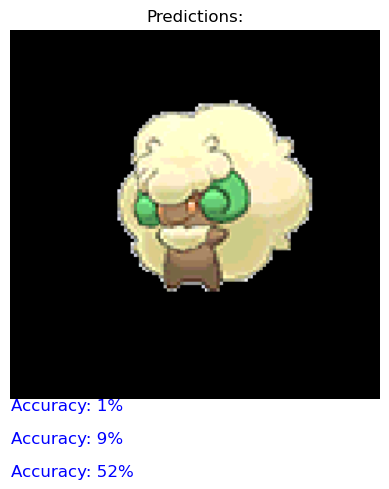

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


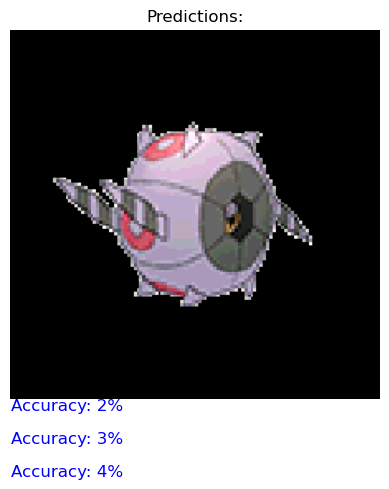

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


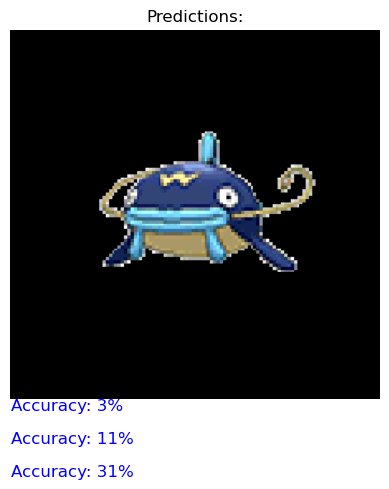

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


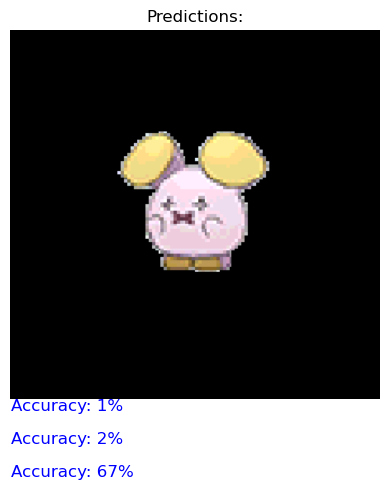

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


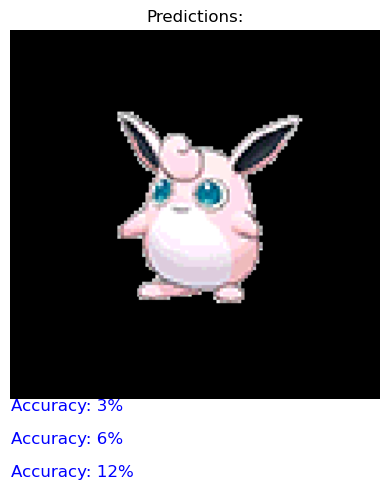

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


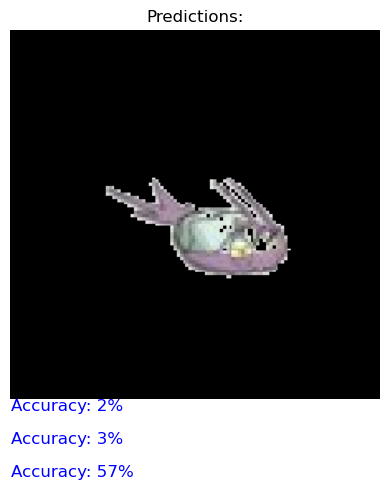

In [6]:

import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import os


def preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)  
    img_array = img_to_array(img)  
    img_array = np.expand_dims(img_array, axis=0)  
    img_array = preprocess_input(img_array)  
    return img, img_array


model = MobileNetV2(weights="imagenet")


image_files = [
    "C:/Users/AI_LAB/Downloads/pokemon dataset/images/whimsicott.png",
    "C:/Users/AI_LAB/Downloads/pokemon dataset/images/whirlipede.png",
    "C:/Users/AI_LAB/Downloads/pokemon dataset/images/whiscash.png",
    "C:/Users/AI_LAB/Downloads/pokemon dataset/images/whismur.png",
    "C:/Users/AI_LAB/Downloads/pokemon dataset/images/wigglytuff.png",
    "C:/Users/AI_LAB/Downloads/pokemon dataset/images/wimpod.png"]


for image_file in image_files:
    try:
        
        img, processed_image = preprocess_image(image_file)

        
        predictions = model.predict(processed_image)

        
        decoded_predictions = decode_predictions(predictions, top=3)[0]  

        
        sorted_predictions = sorted(decoded_predictions, key=lambda x: x[2])

        
        plt.imshow(img)
        plt.axis('off')
        plt.title("Predictions:")
        for i, (imagenet_id, label, score) in enumerate(sorted_predictions):
            accuracy_percentage = int(score * 100)  
            plt.text(0, 230 + i * 20, f"Accuracy: {accuracy_percentage}%", fontsize=12, color='blue')
        plt.show()

    except Exception as e:
        print(f"Error processing {image_file}: {e}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 984ms/step


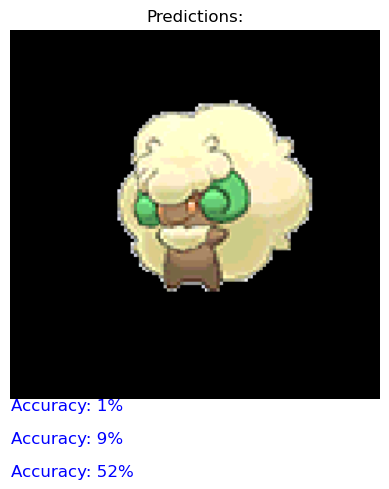

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


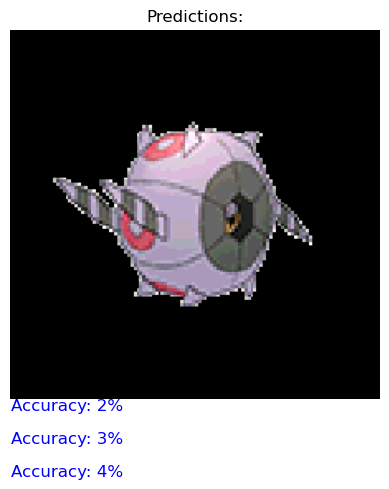

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


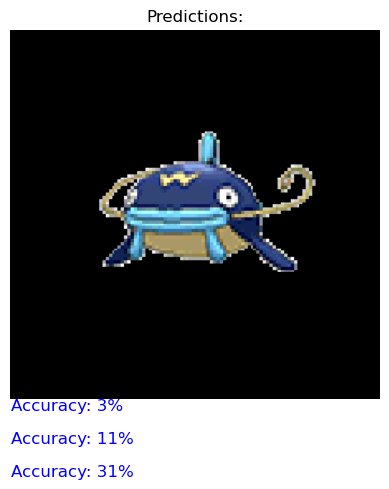

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


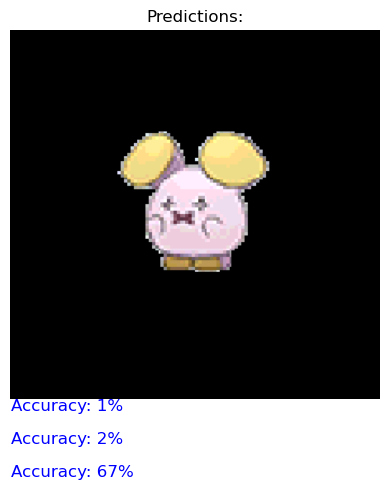

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


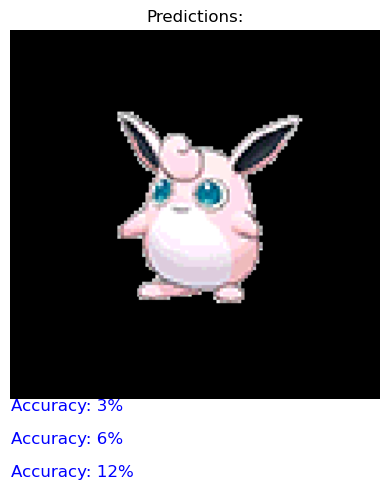

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


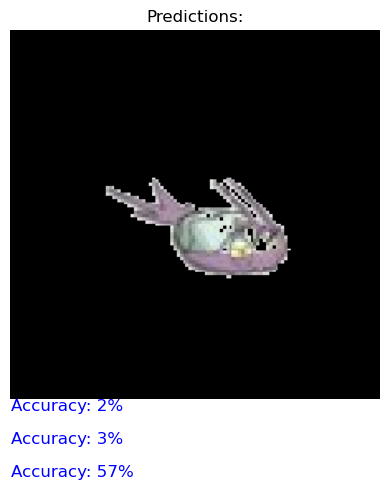

Overall Average Accuracy: 37.17%


In [7]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess the image
def preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img, img_array

# Load the pre-trained model
model = MobileNetV2(weights="imagenet")

# List of image files
image_files = [
    "C:/Users/AI_LAB/Downloads/pokemon dataset/images/whimsicott.png",
    "C:/Users/AI_LAB/Downloads/pokemon dataset/images/whirlipede.png",
    "C:/Users/AI_LAB/Downloads/pokemon dataset/images/whiscash.png",
    "C:/Users/AI_LAB/Downloads/pokemon dataset/images/whismur.png",
    "C:/Users/AI_LAB/Downloads/pokemon dataset/images/wigglytuff.png",
    "C:/Users/AI_LAB/Downloads/pokemon dataset/images/wimpod.png"
]

# List to store accuracy percentages for each prediction
accuracy_values = []

for image_file in image_files:
    try:
        # Preprocess the image
        img, processed_image = preprocess_image(image_file)

        # Make predictions
        predictions = model.predict(processed_image)

        # Decode predictions
        decoded_predictions = decode_predictions(predictions, top=3)[0]

        # Sort predictions by confidence score
        sorted_predictions = sorted(decoded_predictions, key=lambda x: x[2])

        # Extract and store the highest accuracy percentage
        highest_accuracy = int(sorted_predictions[-1][2] * 100)
        accuracy_values.append(highest_accuracy)

        # Display the image and predictions
        plt.imshow(img)
        plt.axis('off')
        plt.title("Predictions:")
        for i, (imagenet_id, label, score) in enumerate(sorted_predictions):
            accuracy_percentage = int(score * 100)
            plt.text(0, 230 + i * 20, f"Accuracy: {accuracy_percentage}%", fontsize=12, color='blue')
        plt.show()

    except Exception as e:
        print(f"Error processing {image_file}: {e}")

# Calculate and display the overall average accuracy
if accuracy_values:
    overall_accuracy = sum(accuracy_values) / len(accuracy_values)
    print(f"Overall Average Accuracy: {overall_accuracy:.2f}%")
else:
    print("No predictions were successfully made.")
